<a href="https://colab.research.google.com/github/VividhaDembla/Yhills_June_2/blob/main/Cab_fare_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df.rename(columns={'amount':'fare_amount'},inplace=True)

**REMOVING FARE AMOUNT<1 AS THE AMOUNT CANNOT BE NEGATIVE**

In [ ]:
sum(df['fare_amount']<1)

10

In [ ]:
df[df['fare_amount']<1]

,unique_id,fare_amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
2780,38:41.0,0.01,2015-05-01 15:38:41 UTC,-73.939041,40.713963,-73.941673,40.713997,1
10002,26:01.0,0.00,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,57:10.0,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,40:28.0,0.00,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
28839,39:10.0,-2.50,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,19:45.0,-2.50,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.00,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,13:39.0,0.00,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [ ]:
df = df.drop(df[df['fare_amount']<1].index, axis=0)

**REMOVING NO OF PASSENGERS<1 AND >6 AS A TAXI WILL HAVE A MINUMUM NO OF PASSENGERS AND CANNOT EXCEED 6:**

In [ ]:
df[df['no_of_passenger']<1]

,unique_id,fare_amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
314,16:15.0,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0
566,33:18.0,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0
678,24:20.0,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0
1160,58:48.0,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0
1935,09:28.0,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0
...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10 UTC,-73.988813,40.731228,-73.954773,40.733567,0
47401,41:22.0,9.7,2012-03-08 12:41:22 UTC,-73.991375,40.732217,-73.976507,40.758900,0
47920,45:00.0,5.3,2012-03-11 18:45:00 UTC,-73.966112,40.794478,-73.953933,40.787287,0
48118,56:28.0,8.1,2011-03-25 19:56:28 UTC,-73.973382,40.743915,-73.948883,40.777647,0


In [ ]:
df[df['no_of_passenger']>6]

,unique_id,fare_amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [ ]:
df = df.drop(df[df['no_of_passenger']<1].index, axis=0)

***LATITUDES RANGE FROM -90 TO 90 AND LONGITUDES RANGE FROM -180 TO 180.REMOVING WHICH DO NOT SATISFY THESE RANGES ***

In [ ]:
print('longitude_of_pickup above 180={}'.format(sum(df['longitude_of_pickup']>180)))
print('longitude_of_pickup below -180={}'.format(sum(df['longitude_of_pickup']<-180)))
print('latitude_of_pickup	above 90={}'.format(sum(df['latitude_of_pickup']>90)))
print('latitude_of_pickup	below -90={}'.format(sum(df['latitude_of_pickup']<-90)))
print('longitude_of_dropoff above 180={}'.format(sum(df['longitude_of_dropoff']>180)))
print('longitude_of_dropoff below -180={}'.format(sum(df['longitude_of_dropoff']<-180)))
print('latitude_of_dropoff below -90={}'.format(sum(df['latitude_of_dropoff']<-90)))
print('latitude_of_dropoff above 90={}'.format(sum(df['latitude_of_dropoff']>90)))

longitude_of_pickup above 180=0
longitude_of_pickup below -180=0
latitude_of_pickup	above 90=1
latitude_of_pickup	below -90=0
longitude_of_dropoff above 180=0
longitude_of_dropoff below -180=0
latitude_of_dropoff below -90=0
latitude_of_dropoff above 90=0


In [ ]:
df = df.drop(df[df['latitude_of_pickup']>90].index, axis=0)

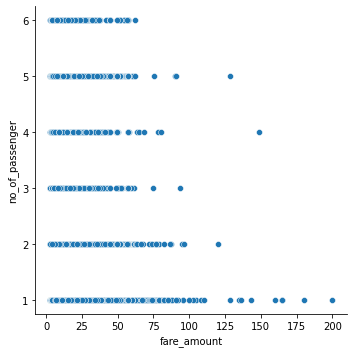

In [ ]:
sns.relplot(x='fare_amount', y='no_of_passenger',data=df)

 **UNIVARIATE BOXPLOTS**

<function matplotlib.pyplot.show>

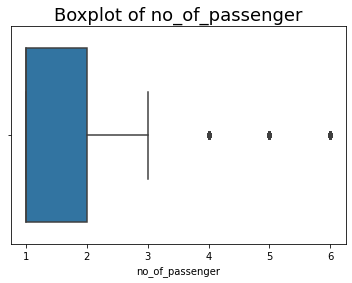

In [ ]:
sns.boxplot(x=df['no_of_passenger'],data=df)
plt.title('Boxplot of no_of_passenger',fontsize=18)
plt.show

<function matplotlib.pyplot.show>

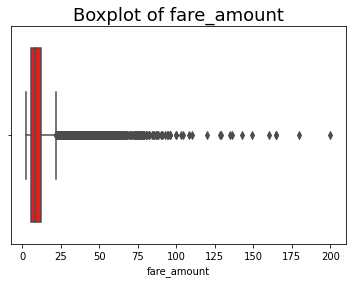

In [ ]:
sns.boxplot(x=df['fare_amount'],data=df,color='red')
plt.title('Boxplot of fare_amount',fontsize=18)
plt.show

**BIVARIATE BOXPLOTS**

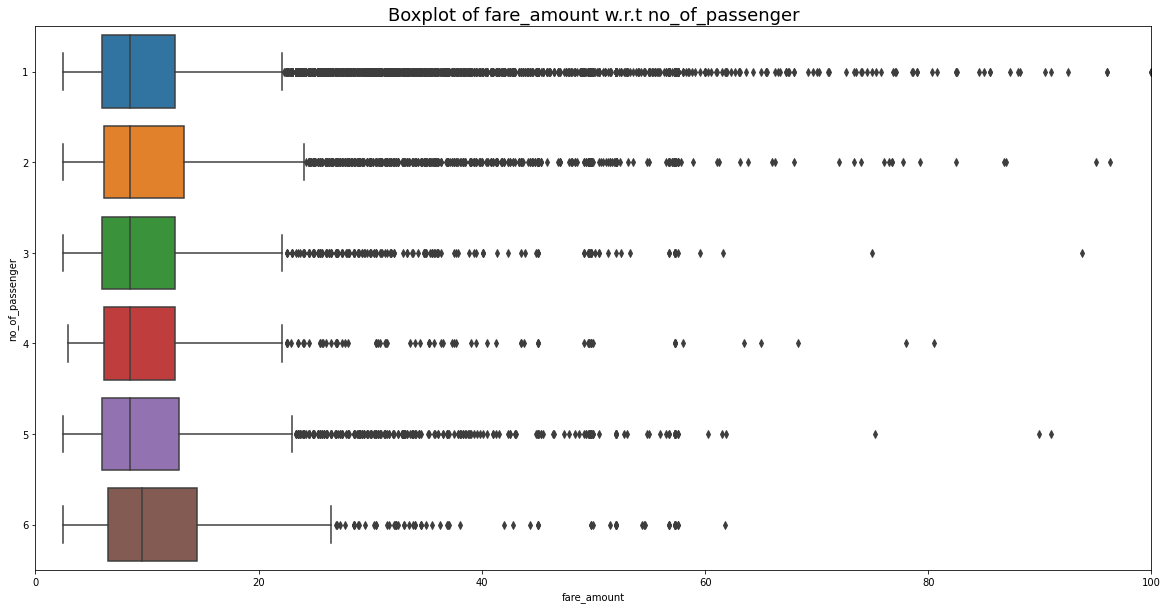

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=df['fare_amount'],y=df['no_of_passenger'],data=df,orient='h')
plt.title('Boxplot of fare_amount w.r.t no_of_passenger',fontsize=18)
plt.show()

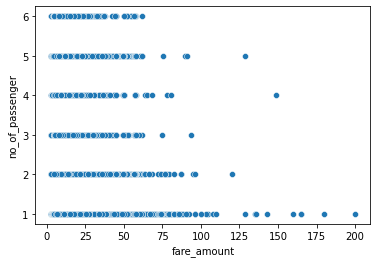

In [ ]:
sns.scatterplot(x='fare_amount',y='no_of_passenger',data=df)

In [ ]:
df.groupby(["unique_id","no_of_passenger"])[["no_of_passenger"]].sum()

no_of_passenger
unique_id no_of_passenger                 
00:00.0   1                            238
          2                             84
          3                             57
          4                             36
          5                            310
...                                    ...
59:57.0   1                              6
          2                              2
59:58.0   1                             10
          2                              8
59:59.0   1                              5

[7994 rows x 1 columns]

In [ ]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True, normalize =True)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept= True, normalize =True)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
n_estimators = [40,80,120,160]

criterion = ["mse","mae"]

max_depth = [int(x) for x in np.linspace(10,200,10)]

min_samples_split= [5,10,15]

min_samples_leaf = [4,6,8,10]

max_features = ['auto', 'sqrt', 'log2']

In [ ]:
param_grid = {"n_estimators":n_estimators, "criterion":criterion, "max_depth":max_depth, "min_samples_split":
             min_samples_split, "min_samples_leaf":min_samples_leaf, "max_features":max_features}

In [ ]:
rf_hyper = RandomForestRegressor()

In [ ]:
rf_randomcv = RandomizedSearchCV(estimator=rf_hyper, param_distributions=param_grid, n_iter=10, 
                                 cv = 2, verbose=1, random_state=100, n_jobs=-1)